# Retrieval Dataset

In [41]:
#import packages
import pandas as pd
import numpy as np
import os
import math

# data visualizaion
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List, Set, Dict, Tuple

# pip install missingno
import missingno as msno
import pprint


# load for MRC datasets
from datasets import load_from_disk

# load for Retrieval dataset
import json

DATA_PATH = "../../data/"

In [43]:
with open(os.path.join(DATA_PATH, "wikipedia_documents.json"), "r", encoding="utf-8") as f:
    wiki = json.load(f)
    
wiki_dataset = pd.DataFrame(wiki)
wiki_dataset = wiki_dataset.transpose()

pprint.pprint(wiki_dataset.columns)
print(f"*"*20)
print(f"Retrieval Dataset Count : {len(wiki_dataset.index)}")

Index(['text', 'corpus_source', 'url', 'domain', 'title', 'author', 'html',
       'document_id'],
      dtype='object')
********************
Retrieval Dataset Count : 60613


- 데이터 구조
    - text: 문서
    - corpus_source: 문서 출처
    - url: 문서 출처 주소
    - domain : 문서의 domain
    - title: 문서의 제목
    - author : wjwk
    - html: html
    - document_id: 문서의 고유 id


## 데이터 개요

In [25]:
wiki_dataset.iloc[0].to_dict()

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

## 결측치 확인

<AxesSubplot:>

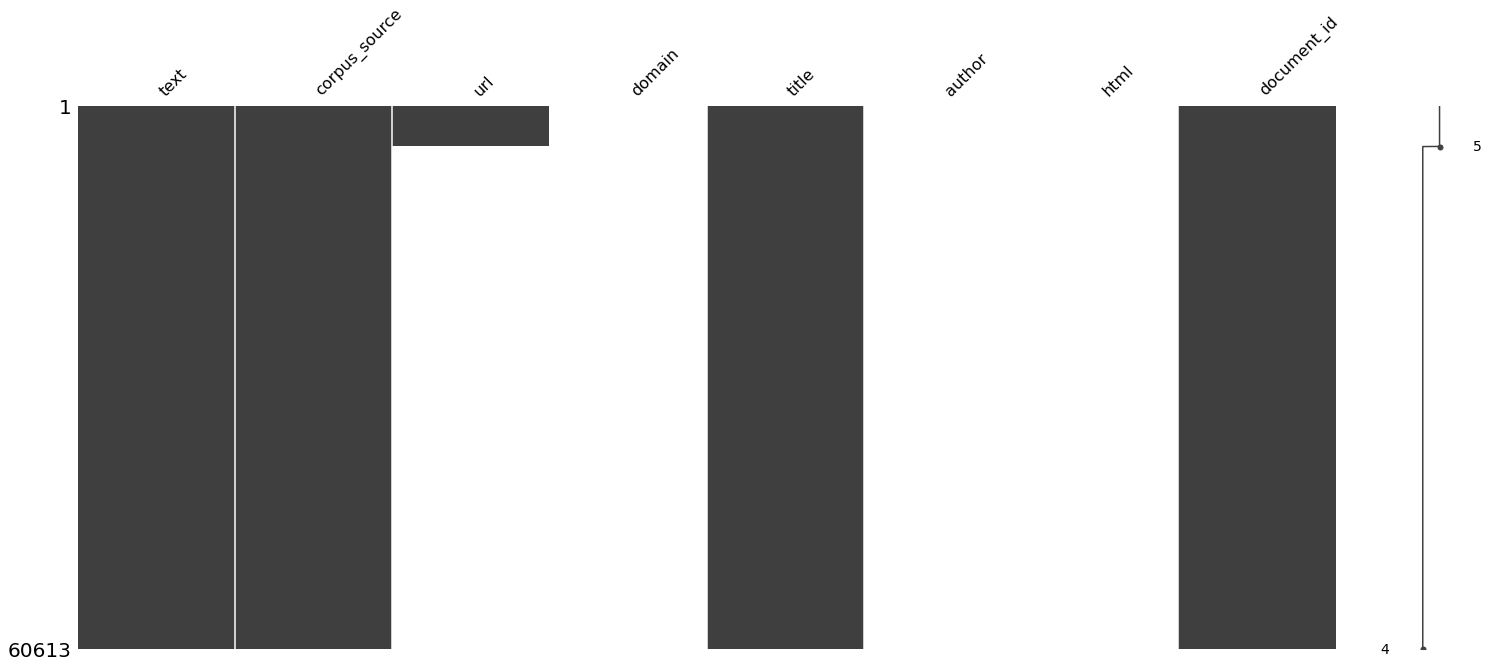

In [26]:
# 결측치 확인
msno.matrix(wiki_dataset)

url에서는 결측치를 보인다.  
author, html은 값이 없음을 보인다.


## 데이터 중복 확인

In [27]:
wiki_dataset.describe(include='all')

,text,corpus_source,url,domain,title,author,html,document_id
count,60613,60613,4554,0,60613,0,0,60613
unique,56737,1,1,0,31755,0,0,60613
top,세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...,위키피디아,TODO,NaN,장면,NaN,NaN,60612
freq,40,60613,4554,NaN,146,NaN,NaN,1


- 중복이 있는 컬럼
    - text
    - title
    - corpus_source
- 중복없는 컬럼
    - document_id


이 중 title, title 에서의 중복 형태를 알아본다.


In [28]:
def display_groupby_duplicated(dataset : pd.DataFrame , n : int , column_list : List[str]) -> pd.DataFrame:
    '''
    Usage:
        dataset: groupby 대상
        n : groupby에서 n개 이상 중복된 개수를 출력
        column_list : column 이름을 담을 list
    '''
    duplicate_results = pd.concat(g for _, g in dataset.groupby(column_list) if len(g) >= n).sort_values(column_list)
    column_name = ",".join(column_list)
    #print(type(column_name))
    print(f"{column_name} group by count : {len(duplicate_results.index)}")
    
    return duplicate_results
    

### title

In [29]:
# title 
duplicate_results = display_groupby_duplicated(wiki_dataset, 2, ["title"])
display(duplicate_results.head())

title group by count : 40595


,text,corpus_source,url,domain,title,author,html,document_id
39917,"ǃ쿵어가 포함된 카어족, 코이산 제어를 연구하는 학자들이 언어를 분류한 방식이 서로...",위키피디아,None,None,!쿵어,None,None,39917
39918,다양한 ǃ쿵어들을 묶은 주어(Ju)는 흡착음을 사용하는 언어 중 코이코이어(Khoe...,위키피디아,None,None,!쿵어,None,None,39918
58025,2002 AW|197은 2002년 1월 10일 캘리포니아 팔로마 천문대에서 마이클 ...,위키피디아,None,None,(55565) 2002 AW197,None,None,58025
58026,"기존에는 다른 카이퍼대 천체와 동일하게 반사율을 0.04로 추정하여 지름을 1,50...",위키피디아,None,None,(55565) 2002 AW197,None,None,58026
60091,〈(Won't You Come Home) Bill Bailey〉는 1902년에 출판...,위키피디아,None,None,(Won't You Come Home) Bill Bailey,None,None,60091


### text

In [30]:
# title 
duplicate_results = display_groupby_duplicated(wiki_dataset, 2, ["text"])
display(duplicate_results.head())

text group by count : 7677


,text,corpus_source,url,domain,title,author,html,document_id
3859,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,TODO,None,로봇 배제 표준,None,None,3859
8413,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,None,None,로봇 배제 표준,None,None,8413
2319,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,TODO,None,삼성SDS,None,None,2319
6873,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,None,None,삼성SDS,None,None,6873
3744,"""아미타불""이라는 낱말은 무량광(無量光: 헤아릴 수 없는 광명을 가진 것)의 뜻인 ...",위키피디아,TODO,None,아미타불,None,None,3744


### conclusion

title에서는 많은 부분들이 중복됨을 보인다.
text에서도 동일한 문장들이 보이고 있으나, document id는 다름도 보여주고 있다.

MRC와 다르게, Retrieval의 경우 text가 필요로 하기 때문에 MRC데이터와는 다르게 중복 제거를 해야함을 보인다.



In [31]:
# 필요없는 컬럼 제거
wiki_dataset = wiki_dataset.loc[:, ['text','title']]
# 중복 제거.
# title은 중복에 대하여 허용할 필요가 있으므로., text에 대해서 제거
wiki_dataset = wiki_dataset.drop_duplicates(['text'], keep = 'first', ignore_index = True)


In [32]:
# 제거 후
display(wiki_dataset.head())
wiki_dataset.describe(include='all')

,text,title
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",나라 목록
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,나라 목록
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,백남준
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",아오조라 문고
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,아오조라 문고


,text,title
count,56737,56737
unique,56737,31726
top,"아리안(Ariane) 시리즈는 유럽 우주국(European Space Agency,...",윤치호
freq,1,107


## wiki_dataset : 컬럼 별 길이

### text

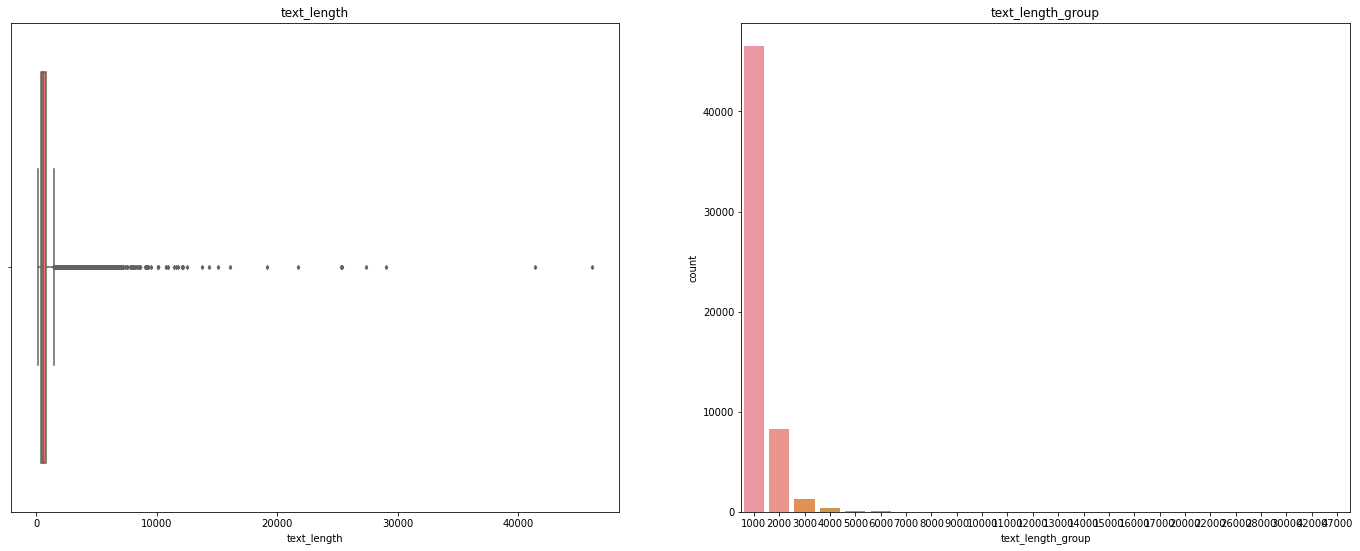

count    56737.000000
mean       750.820593
std        698.576330
min        184.000000
25%        416.000000
50%        578.000000
75%        856.000000
max      46099.000000
Name: text_length, dtype: float64

******************************
max text_length : 46099


,text,title,text_length,text_length_group,title_length,title_length_group
4534,"어딘 실이니 례예 여재라\n\n○ 呂滎公名希哲, 字原明. 申國正獻公之長子. 正...",소학언해,46099,47000,4,5


In [38]:
# text
wiki_dataset['text_length'] = wiki_dataset['text'].map(str).apply(len)

min = 1000 # wiki_dataset['text_length'].min()

min = round(min,(-1)*(len(str(min))-1))
interval = pow(10,(len(str(min)) - 1))

wiki_dataset['text_length_group'] = wiki_dataset['text'].map(lambda x : min + ((len(x)-min)//interval * interval) + interval )


fig, axes = plt.subplots(1, 2, figsize=(24, 9))
sns.boxplot(x = 'text_length', 
            data = wiki_dataset, 
            palette = "Reds", 
            ax = axes[0],
            fliersize = 3
           )

axes[0].set_title('text_length')

sns.countplot(x = 'text_length_group', 
              data = wiki_dataset,
              order = sorted(wiki_dataset['text_length_group'].unique()),
              # palette = "Blues",
              ax = axes[1],
           )

axes[1].set_title('text_length_group')
plt.show()

display(wiki_dataset['text_length'].describe(include='all'))
print(f"*"*30)
print(f"max text_length : {wiki_dataset['text_length'].max()}")
wiki_dataset[wiki_dataset['text_length']==wiki_dataset['text_length'].max()]


문장의 길이가 너무 긴 outlier가 존재함을 보여준다.  
또한 이상한 문자가 포함되어 있음도 보여준다.

### title

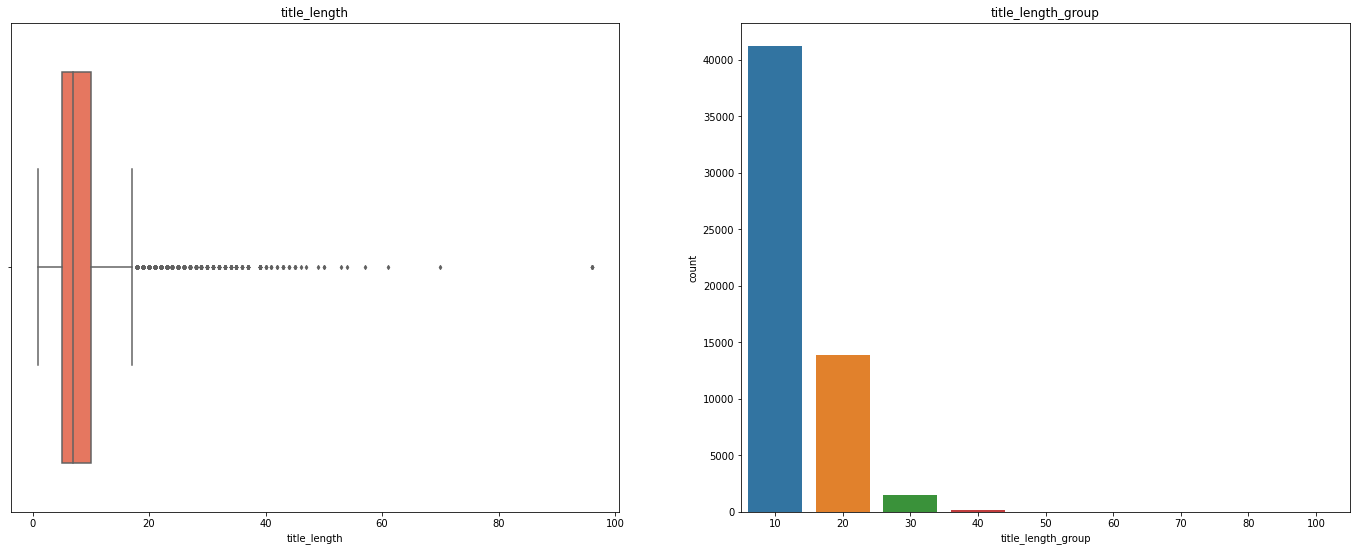

count    56737.000000
mean         7.912702
std          4.862442
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         96.000000
Name: title_length, dtype: float64

******************************
max title : 96


,text,title,text_length,text_length_group,title_length,title_length_group
32654,2013년 9월 18일에 일본무도관에서 개최된 《AKB48 34th 싱글 선발 가위...,플라타너스 나무가 서 있는 길에서 「네 미소가 꿈에 나왔어」라고 말해버린다면 우리들...,356,1000,96,100
32655,괄호 내는 〈AKB48 34th 싱글 선발 가위바위보 대회〉의 순위.\n\n(센터:...,플라타너스 나무가 서 있는 길에서 「네 미소가 꿈에 나왔어」라고 말해버린다면 우리들...,377,1000,96,100
32656,"(센터:오오시마 유코, 와타나베 마유)\n\n* 팀A: 이리야마 안나, 카와에이 리...",플라타너스 나무가 서 있는 길에서 「네 미소가 꿈에 나왔어」라고 말해버린다면 우리들...,395,1000,96,100
32657,"〈플라타너스 나무가 서 있는 길에서 ""네 미소가 꿈에 나왔어""라고 말해버린다면 우리...",플라타너스 나무가 서 있는 길에서 「네 미소가 꿈에 나왔어」라고 말해버린다면 우리들...,846,1000,96,100


In [40]:
# title
wiki_dataset['title_length'] = wiki_dataset['title'].map(str).apply(len)

min = 10 # wiki_dataset['title_length'].min()

min = round(min,(-1)*(len(str(min))-1))
interval = pow(10,(len(str(min)) - 1))

wiki_dataset['title_length_group'] = wiki_dataset['title'].map(lambda x : min + ((len(x)-min)//interval * interval) + interval )


fig, axes = plt.subplots(1, 2, figsize=(24, 9))
sns.boxplot(x = 'title_length', 
            data = wiki_dataset, 
            palette = "Reds", 
            ax = axes[0],
            fliersize = 3
           )

axes[0].set_title('title_length')

sns.countplot(x = 'title_length_group', 
              data = wiki_dataset,
              order = sorted(wiki_dataset['title_length_group'].unique()),
              # palette = "Blues",
              ax = axes[1],
           )

axes[1].set_title('title_length_group')
plt.show()

display(wiki_dataset['title_length'].describe(include='all'))
print(f"*"*30)

print(f"max title : {wiki_dataset['title_length'].max()}")
display(wiki_dataset[wiki_dataset['title_length']==wiki_dataset['title_length'].max()])